<a href="https://colab.research.google.com/github/PratisthaSingh03/PratisthaSingh03/blob/main/EDA_Penguin_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Modules**

In [4]:
!pip install pycountry
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import os

import tensorflow as tf
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
%matplotlib inline

import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot





import warnings
warnings.simplefilter(action = "ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 72.8 MB/s eta 0:00:00


# **Load the Dataset**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv("/content/drive/MyDrive/Untitled folder/penguins_size.csv")
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
data.drop('island', axis = 1, inplace =True)

# **Deriving Insights**

In [7]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   culmen_length_mm   342 non-null    float64
 2   culmen_depth_mm    342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
 5   sex                334 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.2+ KB


In [9]:
data['species'].value_counts()

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


# **Preprocessing the Dataset**

In [10]:
data.isnull().sum()

,0
species,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,10


In [11]:
duplicates = data[data.duplicated()]
print("Number of duplicates: ", len(duplicates))

Number of duplicates:  0


In [12]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# **Exploratory Data Analysis**

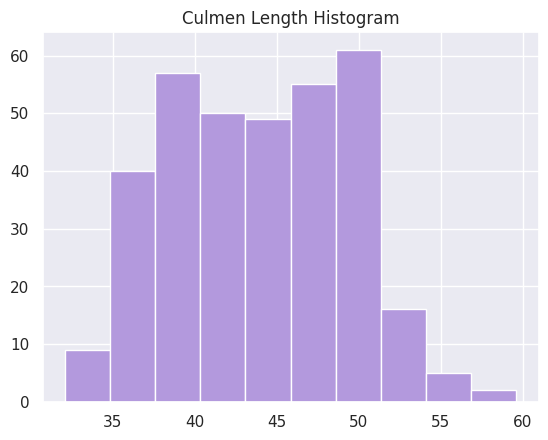

In [ ]:

data['culmen_length_mm'].hist(color='#B399DD', edgecolor='white')
plt.title('Culmen Length Histogram')
plt.show()

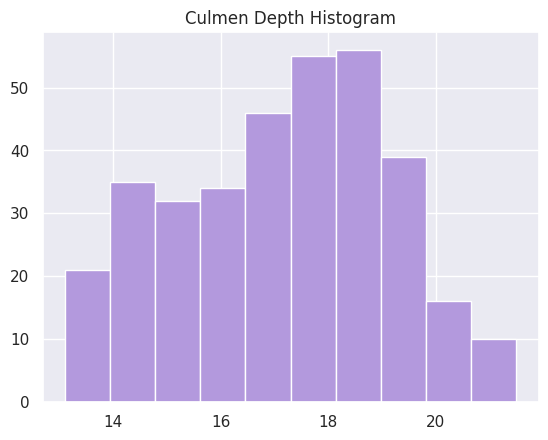

In [ ]:
data['culmen_depth_mm'].hist(color='#B399DD', edgecolor='white')
plt.title('Culmen Depth Histogram')
plt.show()

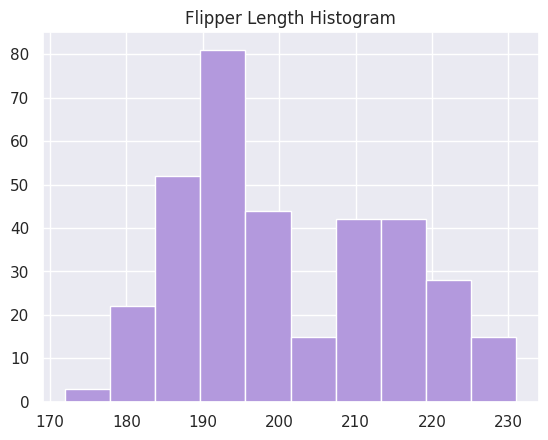

In [ ]:
data['flipper_length_mm'].hist(color='#B399DD', edgecolor='white')
plt.title('Flipper Length Histogram')
plt.show()

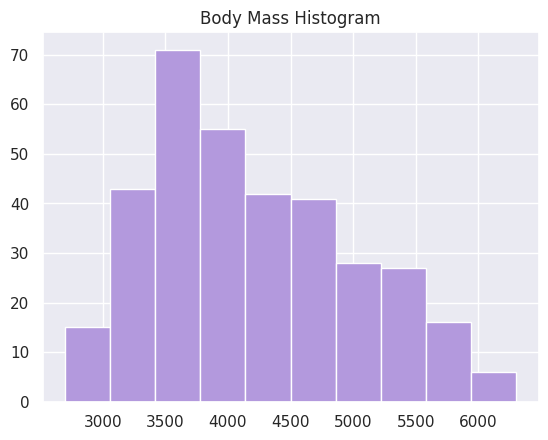

In [ ]:
data['body_mass_g'].hist(color='#B399DD', edgecolor='white')
plt.title('Body Mass Histogram')
plt.show()

In [ ]:
colors = ['#d4a373', '#a8c4a0', '#8e9a5b']
species = [ 'Adelie', 'Gentoo', 'Chinstrap']

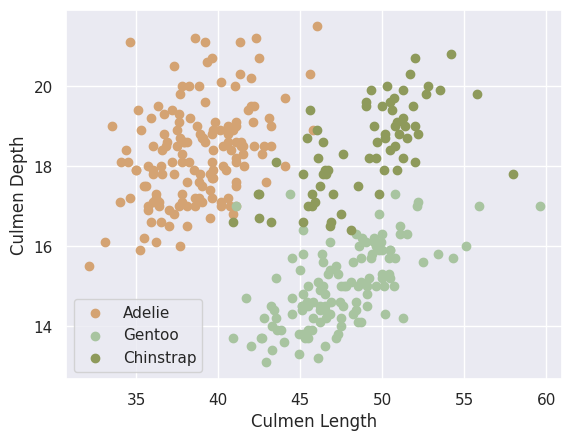

In [ ]:
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['culmen_length_mm'], x['culmen_depth_mm'], c = colors[i], label=species[i])
plt.xlabel("Culmen Length")
plt.ylabel("Culmen Depth")
plt.legend()

In [ ]:
colors2 = ['#ffcaaf', '#B399DD', '#90ee90']
species = [ 'Adelie', 'Gentoo', 'Chinstrap']

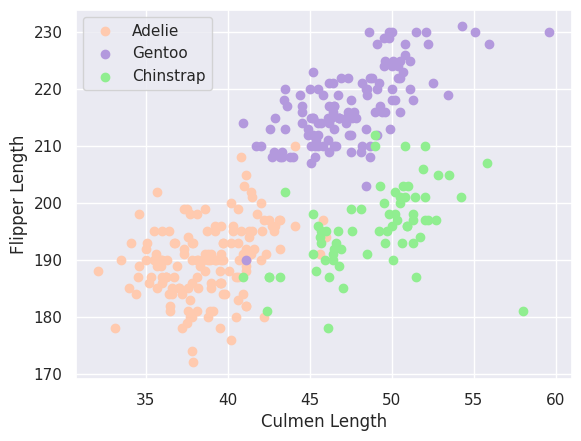

In [ ]:
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['culmen_length_mm'], x['flipper_length_mm'], c = colors2[i], label=species[i])
plt.xlabel("Culmen Length")
plt.ylabel("Flipper Length")
plt.legend()

In [1]:
colors3 = ['#8E7AB5', '#B784B7', '#E493B3']
species = ['Adelie', 'Gentoo', 'Chinstrap']

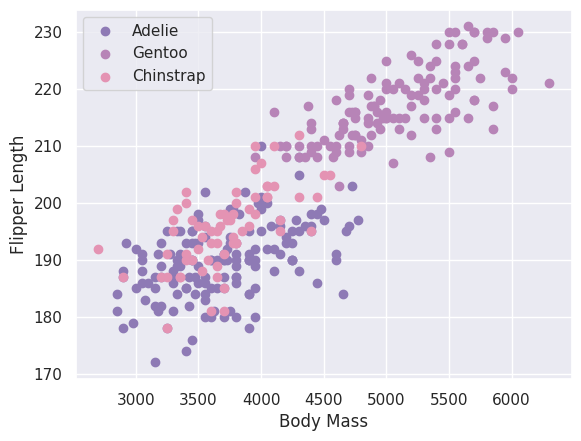

In [17]:
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['body_mass_g'], x['flipper_length_mm'], c = colors3[i], label=species[i])
plt.xlabel("Body Mass")
plt.ylabel("Flipper Length")
plt.legend()

In [2]:
colors4 = ['#461959', '#7A316F', '#CD6688']
species = ['Adelie', 'Gentoo', 'Chinstrap']

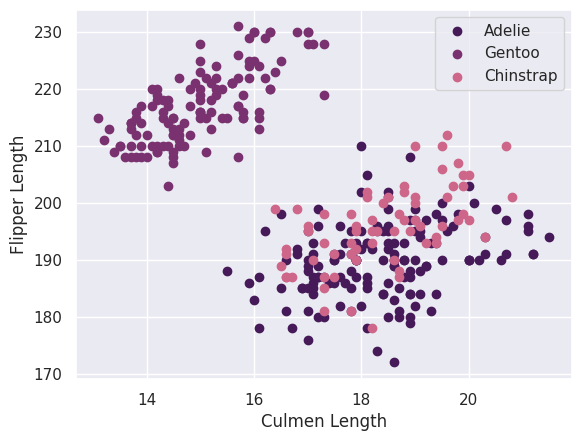

In [18]:
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['culmen_depth_mm'], x['flipper_length_mm'], c = colors4[i], label=species[i])
plt.xlabel("Culmen Length")
plt.ylabel("Flipper Length")
plt.legend()

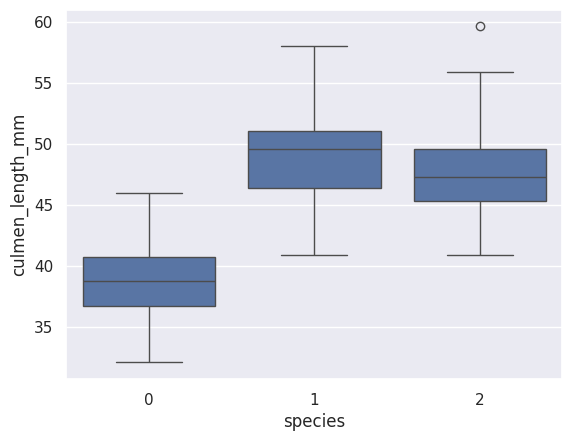

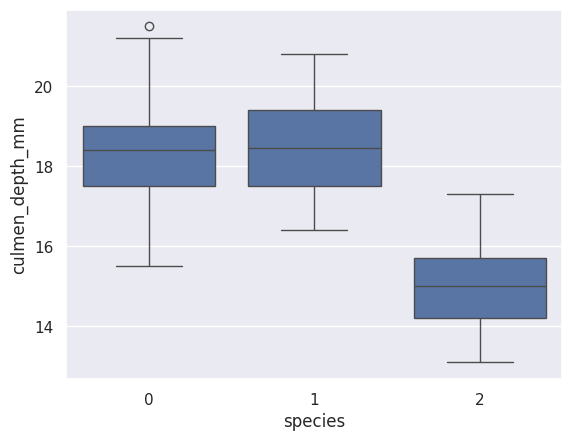

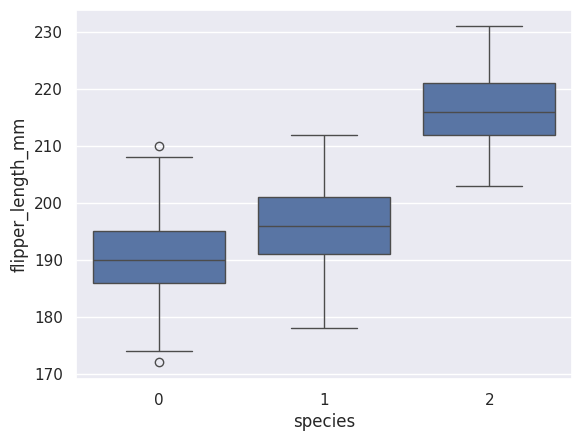

In [34]:
sns.boxplot(x = 'species', y = 'culmen_length_mm', data = data)
plt.show()

sns.boxplot(x = 'species', y = 'culmen_depth_mm', data = data)
plt.show()

sns.boxplot(x = 'species', y = 'flipper_length_mm', data = data)
plt.show()



# **Correlation Matrix**

In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

correlation_matrix = data.corr()

print(correlation_matrix)


                    species  culmen_length_mm  culmen_depth_mm  \
species            1.000000          0.731369        -0.744076   
culmen_length_mm   0.731369          1.000000        -0.235053   
culmen_depth_mm   -0.744076         -0.235053         1.000000   
flipper_length_mm  0.854307          0.656181        -0.583851   
body_mass_g        0.750491          0.595110        -0.471916   
sex               -0.010379          0.269434         0.322860   

                   flipper_length_mm  body_mass_g       sex  
species                     0.854307     0.750491 -0.010379  
culmen_length_mm            0.656181     0.595110  0.269434  
culmen_depth_mm            -0.583851    -0.471916  0.322860  
flipper_length_mm           1.000000     0.871202  0.197440  
body_mass_g                 0.871202     1.000000  0.347376  
sex                         0.197440     0.347376  1.000000  


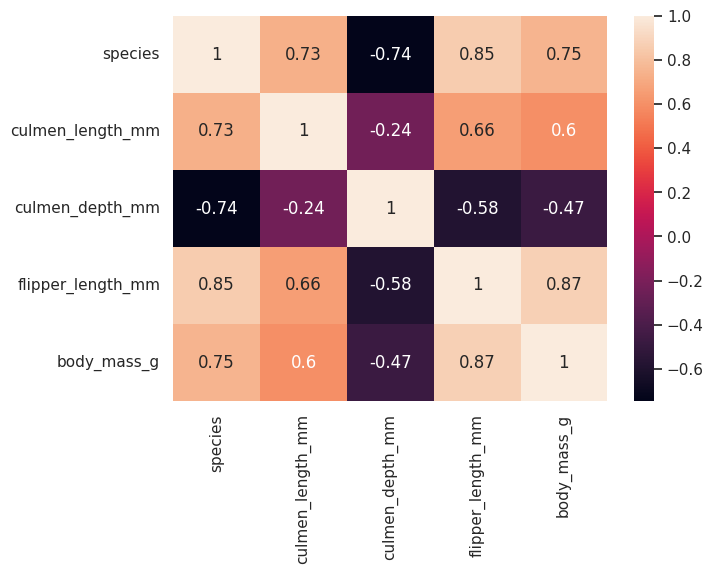

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = data.select_dtypes(include=[float, int])

plt.figure(figsize=(7, 5))
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()


# **Label Encoder**

In [20]:
le = LabelEncoder()

In [22]:
data['species'] = le.fit_transform(data['species'])
data.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,39.1,18.7,181.0,3750.0,MALE
1,0,39.5,17.4,186.0,3800.0,FEMALE
2,0,40.3,18.0,195.0,3250.0,FEMALE
3,0,NaN,NaN,NaN,NaN,NaN
4,0,36.7,19.3,193.0,3450.0,FEMALE


# **Model Training**

# **K-Neighbor Classifier**

In [23]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = data.drop(columns=['species'])
Y = data['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [50]:

for column in x_train.select_dtypes(include=['object']).columns:
    x_train[column] = label_encoder.fit_transform(x_train[column])

for column in x_test.select_dtypes(include=['object']).columns:
    x_test[column] = label_encoder.transform(x_test[column])

if y_train.dtype == 'object':
    y_train = label_encoder.fit_transform(y_train)

if y_test.dtype == 'object':
    y_test = label_encoder.transform(y_test)

imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

model = KNeighborsClassifier()
model.fit(x_train, y_train)

print("Accuracy: ", model.score(x_test, y_test) * 100)


Accuracy:  78.84615384615384


# **Decision Classifier**

In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [43]:
label_encoder = LabelEncoder()

for column in x_train.select_dtypes(include=['object']).columns:
    x_train[column] = label_encoder.fit_transform(x_train[column])

for column in x_test.select_dtypes(include=['object']).columns:
    x_test[column] = label_encoder.transform(x_test[column])

if y_train.dtype == 'object':
    y_train = label_encoder.fit_transform(y_train)

if y_test.dtype == 'object':
    y_test = label_encoder.transform(y_test)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  95.1923076923077


In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

label_encoder = LabelEncoder()


for column in x_train.select_dtypes(include=['object']).columns:
    x_train[column] = label_encoder.fit_transform(x_train[column])


for column in x_test.select_dtypes(include=['object']).columns:
    x_test[column] = label_encoder.transform(x_test[column])


if y_train.dtype == 'object':
    y_train = label_encoder.fit_transform(y_train)

if y_test.dtype == 'object':
    y_test = label_encoder.transform(y_test)


model = DecisionTreeClassifier()
model.fit(x_train, y_train)


print("Accuracy: ", model.score(x_test, y_test) * 100)


Accuracy:  93.26923076923077


# **Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
prediction=model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.9807692307692307


Linear Regression

In [ ]:
x = data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']]
y = data['body_mass_g']


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train, )

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('Coefficients:', linear_reg_model.coef_)
print('Intercept:', linear_reg_model.intercept_)
print('Mean Squared Error:', mean_squared_error(y_test, y_test))
print('R^2 Score:', r2_score(y_test, y_test))

Coefficients: [ 3.40378029 16.69327581 49.81900866]
Intercept: -6252.897987256009
Mean Squared Error: 0.0
R^2 Score: 1.0
